In [2]:
import sklearn
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt 
from mpl_toolkits.mplot3d import Axes3D
import scipy
import statistics
from sklearn import model_selection
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import label_binarize
import os

In [4]:
path = os.getcwd()
#heart_df = pd.read_csv('heart_disease_missing.csv')
#iris_df = pd.read_csv(path+"\\Iris_Kaggle_PDF\\iris_train.csv")
heart_df = pd.read_csv(os.getcwd()+'\\Heart Kaggle PDF\\train.csv')
heart_df_nona = heart_df.dropna()
heart_df_nona["cp"] = heart_df_nona.loc[:,"cp"].replace("Asympt.",0).replace("Atypical",1).replace("Non",2).replace("Typical",3)
heart_df_nona["restecg"] = heart_df_nona.loc[:,"restecg"].replace("Normal",0).replace("ST-T wave",1).replace("LV hyper", 2)
heart_df_nona["slope"] = heart_df_nona.loc[:,"slope"].replace("down",0).replace("flat",1).replace("up",2)
heart_df_nona["thal"] = heart_df_nona.loc[:,"thal"].replace("Revers.",7).replace("Normal",3).replace("Fixed",6)


### The above decription suggests the presence of 

<Figure size 864x864 with 0 Axes>

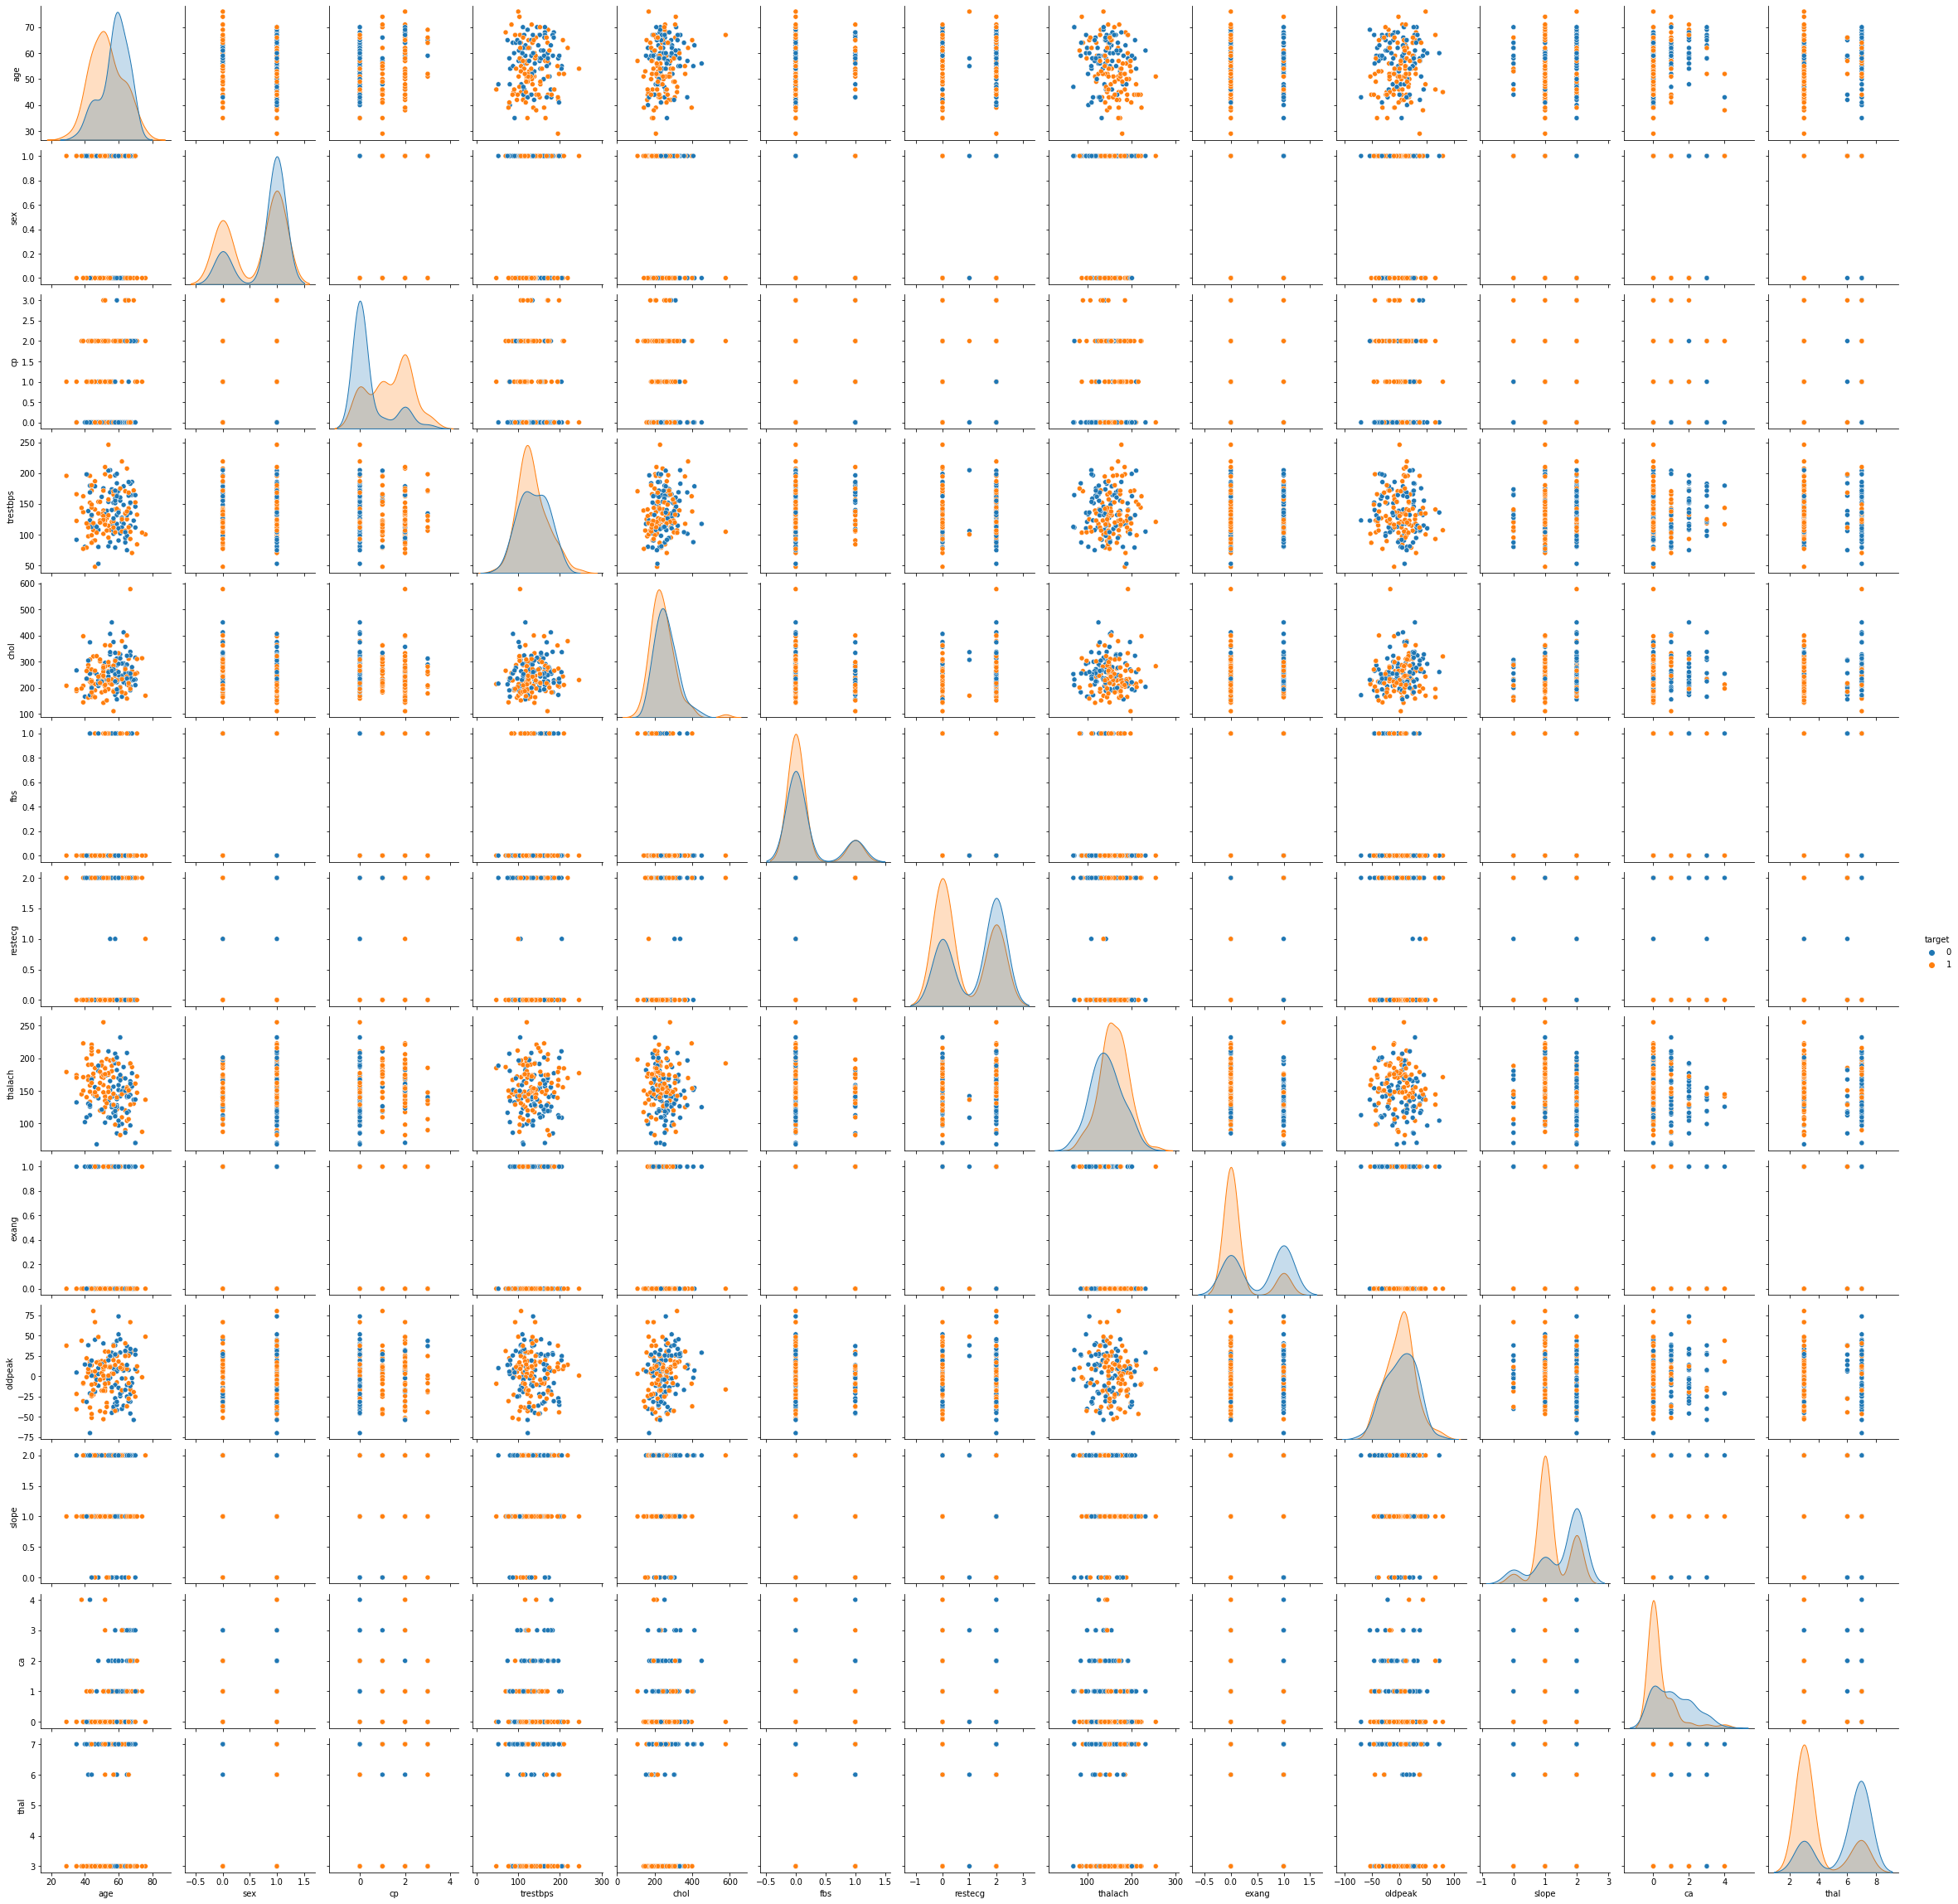

In [5]:
fig1 = plt.figure(figsize=(12,12))
sn = sns.pairplot(heart_df_nona,hue='target', dropna=True)
sn.savefig("CM1_Heart.png")

In [6]:
heart_df_nona.corr()

The history saving thread hit an unexpected error (OperationalError('database or disk is full')).History will not be written to the database.


age       sex        cp  trestbps      chol       fbs  \
age       1.000000 -0.095005  0.028697  0.021308  0.178013  0.091111   
sex      -0.095005  1.000000 -0.080996 -0.015500 -0.193331  0.012435   
cp        0.028697 -0.080996  1.000000 -0.090569 -0.071992  0.060903   
trestbps  0.021308 -0.015500 -0.090569  1.000000  0.092759  0.124548   
chol      0.178013 -0.193331 -0.071992  0.092759  1.000000 -0.101786   
fbs       0.091111  0.012435  0.060903  0.124548 -0.101786  1.000000   
restecg   0.124199  0.041005 -0.155363  0.076240  0.183808  0.065396   
thalach  -0.235938 -0.024364  0.104634  0.001790 -0.001512 -0.090809   
exang     0.082555  0.121776 -0.347505  0.048225  0.072556  0.061599   
oldpeak   0.058832  0.058985 -0.016615 -0.062254  0.150675 -0.127206   
slope     0.158575  0.019543 -0.032023  0.092273  0.122694  0.006496   
ca        0.314769  0.040117 -0.196710  0.029316  0.076372  0.153954   
thal      0.208229  0.313989 -0.274674  0.027234  0.034233  0.111762   
target   -0.256578 -0.216648  0.473035 -0.039201 -0.135221 -0.062668   

           restecg   thalach     exang   oldpeak     slope        ca  \
age       0.124199 -0.235938  0.082555  0.058832  0.158575  0.314769   
sex       0.041005 -0.024364  0.121776  0.058985  0.019543  0.040117   
cp       -0.155363  0.104634 -0.347505 -0.016615 -0.032023 -0.196710   
trestbps  0.076240  0.001790  0.048225 -0.062254  0.092273  0.029316   
chol      0.183808 -0.001512  0.072556  0.150675  0.122694  0.076372   
fbs       0.065396 -0.090809  0.061599 -0.127206  0.006496  0.153954   
restecg   1.000000 -0.073622  0.139295  0.034766  0.086842  0.142146   
thalach  -0.073622  1.000000 -0.303161 -0.102370 -0.100144 -0.215632   
exang     0.139295 -0.303161  1.000000  0.028058  0.235584  0.126271   
oldpeak   0.034766 -0.102370  0.028058  1.000000 -0.087750  0.032403   
slope     0.086842 -0.100144  0.235584 -0.087750  1.000000  0.104387   
ca        0.142146 -0.215632  0.126271  0.032403  0.104387  1.000000   
thal      0.022111 -0.117247  0.280316 -0.039695  0.195064  0.241524   
target   -0.225151  0.244413 -0.431414 -0.016370 -0.254583 -0.368646   

              thal    target  
age       0.208229 -0.256578  
sex       0.313989 -0.216648  
cp       -0.274674  0.473035  
trestbps  0.027234 -0.039201  
chol      0.034233 -0.135221  
fbs       0.111762 -0.062668  
restecg   0.022111 -0.225151  
thalach  -0.117247  0.244413  
exang     0.280316 -0.431414  
oldpeak  -0.039695 -0.016370  
slope     0.195064 -0.254583  
ca        0.241524 -0.368646  
thal      1.000000 -0.537494  
target   -0.537494  1.000000

In [24]:
features = ["exang","thal","ca","cp"]

heart_df_sub = heart_df_nona.copy()
for i in heart_df_nona.columns:
    if i not in features and i not in ["target"]:
        heart_df_sub.drop(columns = [i], inplace=True)
heart_df_sub

cp  exang  ca  thal  target
0     2      0   0     1       1
1     0      0   0     1       1
2     2      0   0     1       1
3     0      1   2     0       0
4     0      0   0     1       1
..   ..    ...  ..   ...     ...
191   1      0   0     1       1
192   0      0   0     0       0
193   2      0   0     0       1
194   1      0   0     1       1
195   0      0   0     1       1

[179 rows x 5 columns]

In [23]:
cols = heart_df_nona.columns
for i in cols:
    try:
        print("Skew of ",i, scipy.stats.skew(heart_df_nona.loc[:,i]))
        print("Kurtosis of ",i, scipy.stats.kurtosis(heart_df_nona.loc[:,i]))
        print("Mean of ",i, statistics.mean(heart_df_nona.loc[:,i]))
        print("Variance of ",i, statistics.variance(heart_df_nona.loc[:,i]))
        print("")
    except:
        pass


Skew of  age -0.2081813553625888
Kurtosis of  age -0.6174029445538709
Mean of  age 55.09497206703911
Variance of  age 85.4459858138221

Skew of  sex -0.8072875102923988
Kurtosis of  sex -1.3482868757259001
Mean of  sex 0.6871508379888268
Variance of  sex 0.21618228610884438

Skew of  cp 0.5163770958069526
Kurtosis of  cp -1.1764768002712227
Mean of  cp 0.8994413407821229
Variance of  cp 0.9785951917644844

Skew of  trestbps 0.30962634103809283
Kurtosis of  trestbps -0.16264443837938236
Mean of  trestbps 135.38329773587722
Variance of  trestbps 1232.629721129242

Skew of  chol 1.2066084201594358
Kurtosis of  chol 3.4699567114715943
Mean of  chol 250.55689390861122
Variance of  chol 4041.9614082782555

Skew of  fbs 1.779890150696346
Kurtosis of  fbs 1.1680089485458618
Mean of  fbs 0.16759776536312848
Variance of  fbs 0.14029251145565252

Skew of  restecg 0.022345341889146123
Kurtosis of  restecg -1.9824509387755107
Mean of  restecg 0.9888268156424581
Variance of  restecg 0.98863850354654

In [39]:
heart_df_X = heart_df_sub.copy().drop(columns=["target"])
heart_df_Y = heart_df_sub.copy().drop(columns=features)

In [40]:
X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split(heart_df_X, heart_df_Y, test_size = 0.2, random_state = 275)
X_train, X_val, Y_train, Y_val = sklearn.model_selection.train_test_split(X_train, Y_train, test_size = 0.2, random_state= 275)

Text(0.5, 1.0, 'KNN classifier; Iris Dataset; No data cleaning')

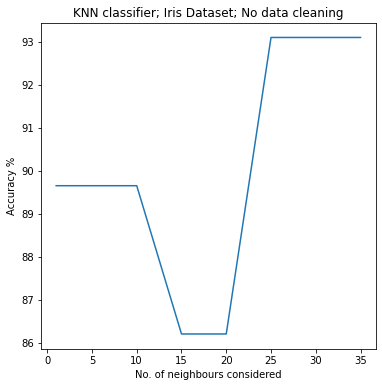

In [41]:
k_n = [1, 5, 10, 15, 20, 25, 30, 35]
score_list = []
for k in k_n:
    knn_model = KNeighborsClassifier(n_neighbors= k)
    knn_model.fit(X_train,Y_train)
    Y_val_pred = knn_model.predict(X_val)
    pred_score = sklearn.metrics.accuracy_score(Y_val, Y_val_pred, normalize=True) * 100
    score_list.append(pred_score)
fig2 = plt.figure(figsize=(6,6))
plt.plot(k_n,score_list)
plt.xlabel('No. of neighbours considered')
plt.ylabel('Accuracy %')
plt.title('KNN classifier; Iris Dataset; No data cleaning')

### One can notice that the performance of KNN classifier on the plain dataset is not very good over the given range of K values. The best performance is attained at K = 25

In [107]:
def multiclass_roc_auc_score(y_test, y_pred, average="macro"):
    lb = sklearn.preprocessing.LabelBinarizer()
    lb.fit(y_test)
    y_test = lb.transform(y_test)
    y_pred = lb.transform(y_pred)
    return sklearn.metrics.roc_auc_score(y_test, y_pred, average='weighted')

### To compute roc curve in multiclass setting, we are using one hot encoding to encode the different classes

In [42]:
X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split(heart_df_X, heart_df_Y, test_size = 0.2, random_state = 275)
X_train, X_val, Y_train, Y_val = sklearn.model_selection.train_test_split(X_train, Y_train, test_size = 0.2, random_state= 275)
knn_model = KNeighborsClassifier(n_neighbors=25)
knn_model.fit(X_train,Y_train)
Y_pred = knn_model.predict(X_test)
auc_score = sklearn.metrics.roc_auc_score(Y_test, Y_pred, average='weighted')
aucc_score = sklearn.metrics.accuracy_score(Y_test,Y_pred)
f_score = sklearn.metrics.f1_score(Y_test, Y_pred, average='weighted')
print('AUC Score; K = 25; heart - No cleaning...',auc_score)
print('Accuracy; K = 25, heart - No cleaning...',aucc_score)
print('F-score; K = 25, heart - No cleaning...', f_score)

AUC Score; K = 25; heart - No cleaning... 0.6857585139318885
Accuracy; K = 25, heart - No cleaning... 0.6944444444444444
F-score; K = 25, heart - No cleaning... 0.6858683061569991


# Dealing with outliers

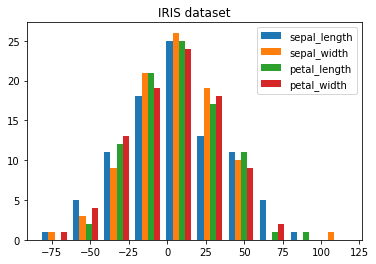

In [308]:
iris_df_X = iris_df.copy()
iris_df_X = iris_df.dropna().drop(columns=['species'])
iris_df_Y = iris_df.dropna().drop(columns=["sepal_length","sepal_width","petal_length","petal_width"])
n_bins = 10
plt.hist([iris_df_X.iloc[:,0],iris_df_X.iloc[:,1],iris_df_X.iloc[:,2], iris_df_X.iloc[:,3]],n_bins)
plt.title('IRIS dataset')
plt.legend(["sepal_length","sepal_width","petal_length","petal_width"])
plt.show()

### One can notice outliers in sepal_width, sepal_length and petal_length on either extremes of the histogram.

In [309]:
thres = 70
outlier_ = iris_df_X[iris_df_X['sepal_length']>thres]
iris_df_X.drop(index = list(outlier_.index), inplace=True)
iris_df_Y.drop(index = list(outlier_.index), inplace=True)
outlier_ = iris_df_X[iris_df_X['sepal_width']>thres]
iris_df_X.drop(index = list(outlier_.index), inplace=True)
iris_df_Y.drop(index = list(outlier_.index), inplace=True)
outlier_ = iris_df_X[iris_df_X['petal_length']>thres]
iris_df_X.drop(index = list(outlier_.index), inplace=True)
iris_df_Y.drop(index = list(outlier_.index), inplace=True)
outlier_ = iris_df_X[iris_df_X['petal_width']>thres]
iris_df_X.drop(index = list(outlier_.index), inplace=True)
iris_df_Y.drop(index = list(outlier_.index), inplace=True)
outlier_ = iris_df_X[iris_df_X['sepal_length']<-thres]
iris_df_X.drop(index = list(outlier_.index), inplace=True)
iris_df_Y.drop(index = list(outlier_.index), inplace=True)
outlier_ = iris_df_X[iris_df_X['sepal_width']<-thres]
iris_df_X.drop(index = list(outlier_.index), inplace=True)
iris_df_Y.drop(index = list(outlier_.index), inplace=True)
outlier_ = iris_df_X[iris_df_X['petal_width']<-thres]

iris_df_X.drop(index = list(outlier_.index), inplace=True)
iris_df_Y.drop(index = list(outlier_.index), inplace=True)
outlier_ = iris_df_X[iris_df_X['petal_length']<-thres]
iris_df_X.drop(index = list(outlier_.index), inplace=True)
iris_df_Y.drop(index = list(outlier_.index), inplace=True)

### We have removed the outliers that lie outside the [-70, 70] range. Having negative values in measurement of length and width does not seem to make sense. As very little information is given on how these values were measured and the unit of measurement, it is hard to take a call on whether to consider negative values or not. Moreover, since almost all the entries have atleast one negative value in them, we will try to work with negative values as such.

# Normalization
### We will perform Z-score normalization on each attribute entries to normalize the data entries by subtracting it with mean and dividing each entry by standard deviation.

In [52]:
heart_df_X_norm = heart_df_X.copy()
for i in heart_df_X.columns:
    heart_df_X_norm[i] = (heart_df_X.loc[:,i] - heart_df_X.describe().loc['mean',i])/heart_df_X.describe().loc['std',i]
heart_df_Y_norm = heart_df_Y.copy()
heart_df_X_norm.describe()

cp         exang            ca          thal
count  179.000000  1.790000e+02  1.790000e+02  1.790000e+02
mean     0.000000 -1.984756e-17 -9.923781e-18 -6.946647e-17
std      1.000000  1.000000e+00  1.000000e+00  1.000000e+00
min     -0.909225 -7.080854e-01 -7.126413e-01 -1.102848e+00
25%     -0.909225 -7.080854e-01 -7.126413e-01 -1.102848e+00
50%      0.101652 -7.080854e-01 -7.126413e-01  5.844150e-01
75%      1.112530  1.404369e+00  2.762176e-01  5.844150e-01
max      2.123407  1.404369e+00  3.242794e+00  2.271678e+00

Best K is... 7
AUC Score; K = 7 ; heart  ... 0.8333333333333334
Accuracy; K = 7 ; heart  ... 0.8333333333333334
F-score; K = 7 ; heart ... 0.8328173374613004


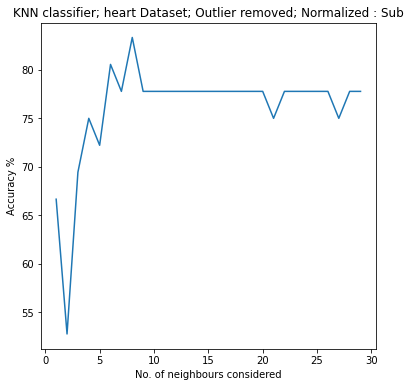

In [57]:
X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split(heart_df_X_norm, heart_df_Y_norm, test_size = 0.4, random_state = 275)
X_test, X_val, Y_test, Y_val = sklearn.model_selection.train_test_split(X_test, Y_test, test_size = 0.5, random_state= 275)
k_n = range(1,30)
score_list = []
for k in k_n:
    knn_model = KNeighborsClassifier(n_neighbors= k, metric = 'manhattan')
    knn_model.fit(X_train,Y_train)
    Y_val_pred = knn_model.predict(X_val)
    pred_score = sklearn.metrics.accuracy_score(Y_val, Y_val_pred, normalize=True) * 100
    score_list.append(pred_score)
fig2 = plt.figure(figsize=(6,6))
plt.plot(k_n,score_list)
plt.xlabel('No. of neighbours considered')
plt.ylabel('Accuracy %')
plt.title('KNN classifier; heart Dataset; Outlier removed; Normalized : Sub')
best_k = score_list.index(max(score_list))
print('Best K is...', best_k)
knn_model = KNeighborsClassifier(n_neighbors=best_k, metric = 'manhattan')
knn_model.fit(X_train,Y_train)
Y_pred = knn_model.predict(X_test)
auc_score = sklearn.metrics.roc_auc_score(Y_test, Y_pred, average='weighted')
aucc_score = sklearn.metrics.accuracy_score(Y_test,Y_pred, normalize=True)
f_score = sklearn.metrics.f1_score(Y_test, Y_pred, average='weighted')
print('AUC Score; K =',best_k,'; heart  ...',auc_score)
print('Accuracy; K =',best_k,'; heart  ...',aucc_score)
print('F-score; K =',best_k,'; heart ...', f_score)

In [324]:
a = score_list.index(max(score_list))
a

12

## Handling negative values

In [67]:
iris_df.describe()

sepal_length  sepal_width  petal_length  petal_width
count    105.000000    99.000000     98.000000   103.000000
mean       4.483455     8.833197      6.901250     1.072824
std       30.853799    29.513908     27.901687    30.057568
min      -64.939919   -63.292986    -47.211576   -83.378535
25%      -16.095345    -7.273014    -12.107943   -20.686096
50%        4.238235    11.598673      6.257712     1.785393
75%       20.896169    26.123211     25.398957    22.570313
max       86.373997   118.661487     84.863246    70.661911

### The IRIS dataset is plagued with negative entries that denote distance which makes no sense. Shifting the entire dataset to positive side has little to no impact on KNN classifier performance as doing so preserves the physical distribution of the points with respect to one another. Meaning, shifting simply does not change the distance between points. So we will first eliminate negative entries from our dataset.

In [147]:
iris_df_X = iris_df.copy()
iris_df_X = iris_df_X.drop(columns=['species']).dropna()
df_len = iris_df_X
neg_labels = []
for i in range(len(iris_df_X)):
    if min(iris_df_X.iloc[i,:])<0:
        neg_labels.append(i)


In [148]:
len(neg_labels)

80

In [149]:
len(iris_df_X)

90

In [3]:

heart_df.describe()

age         sex    trestbps        chol         fbs     thalach  \
count  196.000000  196.000000  191.000000  191.000000  196.000000  196.000000   
mean    54.943878    0.683673  134.995491  248.715780    0.163265  152.267509   
std      9.208798    0.466233   35.774185   63.345700    0.370554   34.024534   
min     29.000000    0.000000   47.797089  109.798882    0.000000   67.921665   
25%     48.000000    0.000000  109.760398  209.001572    0.000000  128.636593   
50%     56.000000    1.000000  131.990868  240.615978    0.000000  150.487581   
75%     62.000000    1.000000  162.664967  281.379933    0.000000  175.111881   
max     76.000000    1.000000  246.069397  577.580923    1.000000  255.020821   

            exang     oldpeak          ca      target  
count  196.000000  194.000000  196.000000  196.000000  
mean     0.346939    2.540843    0.709184    0.545918  
std      0.477215   26.921986    1.013811    0.499162  
min      0.000000  -70.067192    0.000000    0.000000  
25%      0.000000  -17.339158    0.000000    0.000000  
50%      0.000000    5.286207    0.000000    1.000000  
75%      1.000000   19.595852    1.000000    1.000000  
max      1.000000   79.996590    4.000000    1.000000